<a href="https://colab.research.google.com/github/VicariousVision/CF/blob/main/Cash_Flow_Final_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
# make an in-sample forecast
import pandas as pd
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
#from fbprophet import Prophet
from matplotlib import pyplot
#Ensambhdjkfvbdslf methods 
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns

In [ ]:
!python -m pip install prophet


In [137]:
  df = pd.read_csv("cash_flow_data.csv", infer_datetime_format=True,parse_dates={'ds' : ['date']})
  df=df.fillna(0)

In [168]:
df.transaction.unique()

array(['LOCAL INTEREST ON CALL', 'DIVIDENDS', 'EXCH. RATE DIFF',
       'INTEREST LOCAL', 'INTEREST FOREIGN', 'WHOLESALE FOREX PAYMENTS',
       'LOCAL AP', 'OTHER / TELKOM MOBILE', 'ABSA BANK', 'STD BANK',
       'AP FOREX PAYMENTS', 'CASHIERS', 'MONEY MARKET FEES', 'SALARIES',
       'MTN / VODACOM / CELL-C / NEOTEL',
       'INTERNATIONAL ROAMING (GSM)  - ',
       'TELKOM MOBILE & DOMESTIC OPERATORS ', 'BCX CREDITOR RECEIPTS',
       'WHOLESALE FX RECEIPTS', 'TRUDON COLLECTIONS REFUND',
       "DIRECTOR'S FEES", 'E-FILLING', 'BONDS', 'MEDSCHEMES', 'BESTMED',
       'PENSIONS', 'VAT', 'BCX', 'EMPLOYEE SALE OF SHARES',
       'FOREX PURCHASES', 'UNIONS', 'SHARE BUY BACK', 'SUNDRY PAYMENTS',
       'AP PAYMENTS', 'MONEY MARKET SWAP', 'INTEREST BONDS/CPs',
       'E-FILLING (PAYE, SDL & UIF)', 'INTEREST REPOS/CARRIES',
       'OTHER EMPLOYEE COSTS', 'SHORT TERM INCENTIVE',
       'MEDICAL SCHEMES incl. PENSIONERS', 'INTEREST LOANS', 'OTHER ',
       'BIDVEST/BROLL PAYMENTS', 'INTEREST 

In [159]:
df.transaction.value_counts().head()

ABSA BANK                831
STD BANK                 822
AP PAYMENTS              784
SUNDRY PAYMENTS          630
OTHER / TELKOM MOBILE    304
Name: transaction, dtype: int64

In [164]:
def cash_flow(transaction,group):

    df = pd.read_csv("cash_flow_data.csv", infer_datetime_format=True,parse_dates={'ds' : ['date']})
    df=df.fillna(0)

    subcategory ='subcategory'
    transaction = transaction
    group = group



    grouped = df.groupby(subcategory)
    df_grouped = grouped.get_group(group) #old collections df

    df_grouped=df_grouped.drop_duplicates()


    df_transaction = df_grouped.groupby('transaction')
    account_df = df_transaction.get_group(transaction)
    account_df=account_df.drop(['transaction','subcategory','budgeted'],axis=1)

    #rename column
    account_df.rename(columns = {'actual':'y','dt':'ds'},inplace = True)

    #split 
    df_train = account_df[account_df.ds<'2022-01-01']
    df_test = account_df[account_df.ds>'2021-12-31']
    df_test


    # define the model
    model = Prophet()
    # fit the model
    model.fit(df_train)
    # define the period for which we want a prediction

    predict_dates = pd.DataFrame()
    predict_dates['ds'] = df_test.ds.values


    predictions = model.predict(predict_dates)
    # summarize the forecast
    print(predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
    # plot forecast
    model.plot(predictions)
    rmse = np.sqrt(mean_squared_error(df_test.y, predictions.yhat))
    mape =  mean_absolute_percentage_error(df_test.y,predictions.yhat)
    return pyplot.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzbm3yydu/_ubtwq72.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzbm3yydu/wgg5sxk7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8502', 'data', 'file=/tmp/tmpzbm3yydu/_ubtwq72.json', 'init=/tmp/tmpzbm3yydu/wgg5sxk7.json', 'output', 'file=/tmp/tmpzbm3yydu/prophet_model9ql3g_z6/prophet_model-20221028110818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:08:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:08:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds        yhat  yhat_lower  yhat_upper
0 2022-01-03  109.997478  -63.850966  296.068739
1 2022-01-05  106.498211  -86.676344  279.418224
2 2022-01-07  164.114810  -19.536440  345.767789
3 2022-01-11   86.054846 -103.849123  275.167926
4 2022-01-13   78.947488  -96.705601  264.918639


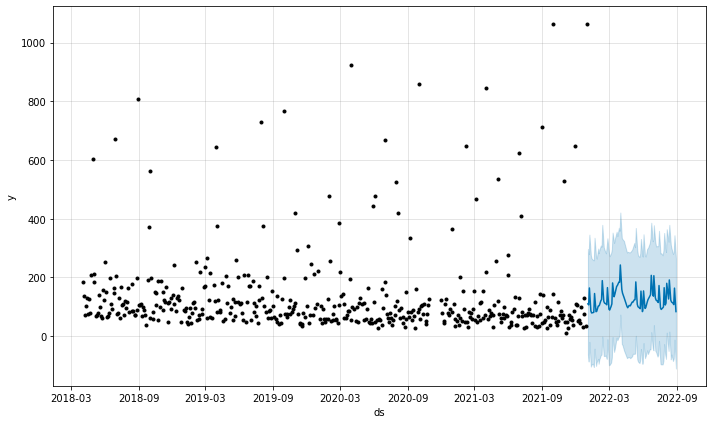

In [165]:
cash_flow("ABSA BANK",'COLLECTIONS')

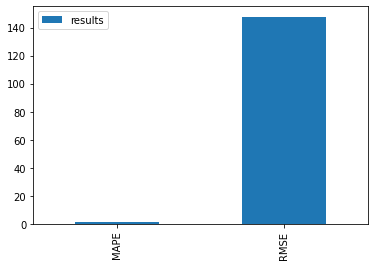

In [166]:
#rmse = np.sqrt(mean_squared_error(df_test.y, predictions.yhat))
#mape =  mean_absolute_percentage_error(df_test.y,predictions.yhat)
results = pd.DataFrame({'results':[mape,rmse]},index=['MAPE','RMSE'])
results.plot(kind='bar')

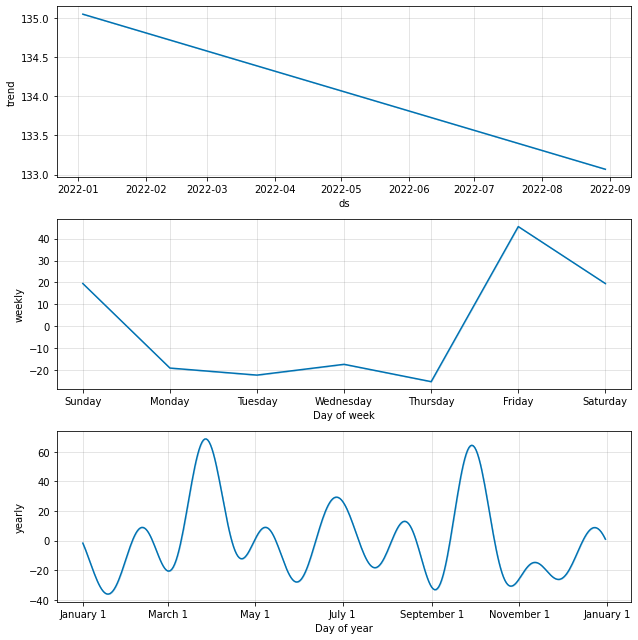

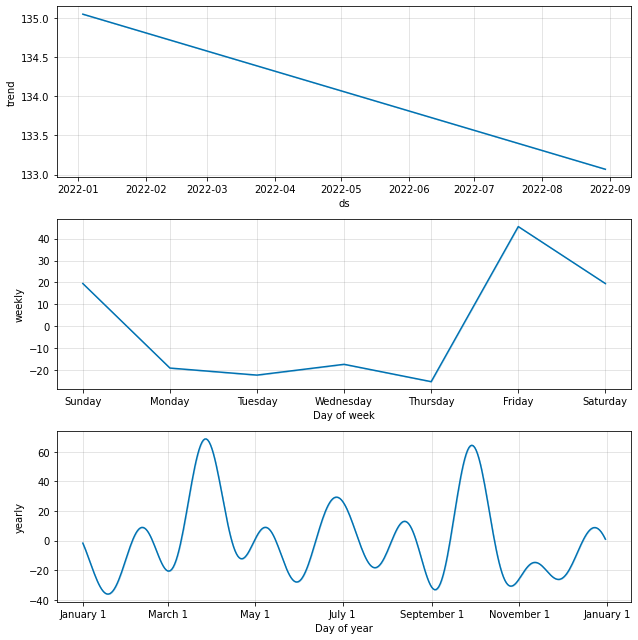

In [135]:
model.plot_components(predictions)

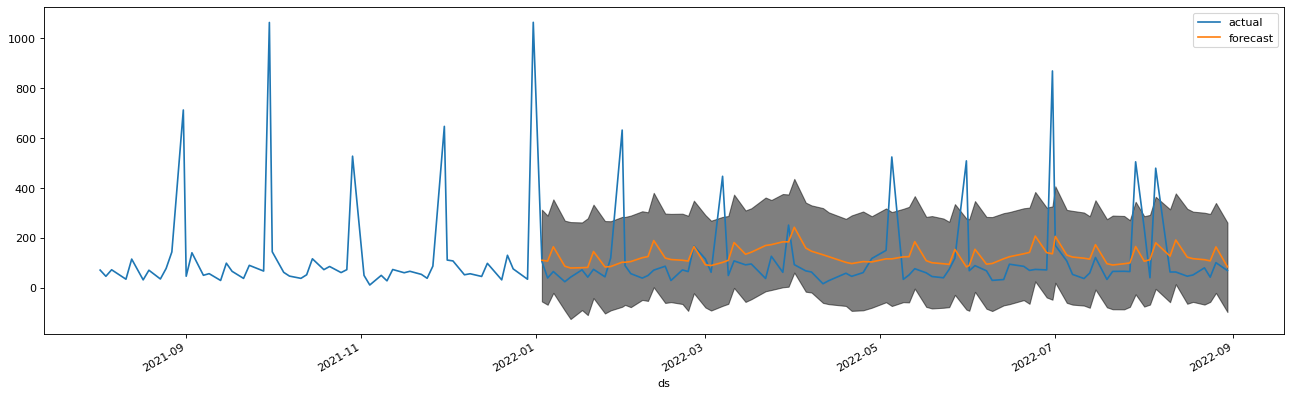

In [136]:
account_df.index = pd.to_datetime(account_df.ds)
predictions.index = df_test.ds
valid = df_test
valid.index = df_test.ds

from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)

ax=account_df[account_df.index>'2021-07-30']['y'].plot(label = 'actual')
predictions.yhat.plot(ax=ax,label = 'forecast')
ax.fill_between(predictions.index,predictions.yhat_lower,predictions.yhat_upper,color='k',alpha=0.5)
plt.legend()

In [167]:
mape, rmse

(1.1127740664123291, 147.76806904176928)